<a href="https://colab.research.google.com/github/Namia663/heart-disease-prediction/blob/main/02_machine_learning_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
%matplotlib inline

# read in all our data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

## Data Preprocessing

In [ ]:
unique_counts = df.nunique()
unique_counts

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Menemukan Duplikat data berdasarkan semua kolom
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

723

In [ ]:
# Menemukan duplikat data untuk tiap baris data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
# Menampilkan baris data yang duplikat
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Mengatasi duplikat dengan menghapus baris duplikat
data_cleaned = df.drop_duplicates()

# Menampilkan dataset setelah mengatasi duplikat
data_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# Menemukan Duplikat data berdasarkan semua kolom
data_cleaned.duplicated().values.any()

False

In [ ]:
df2 = data_cleaned.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


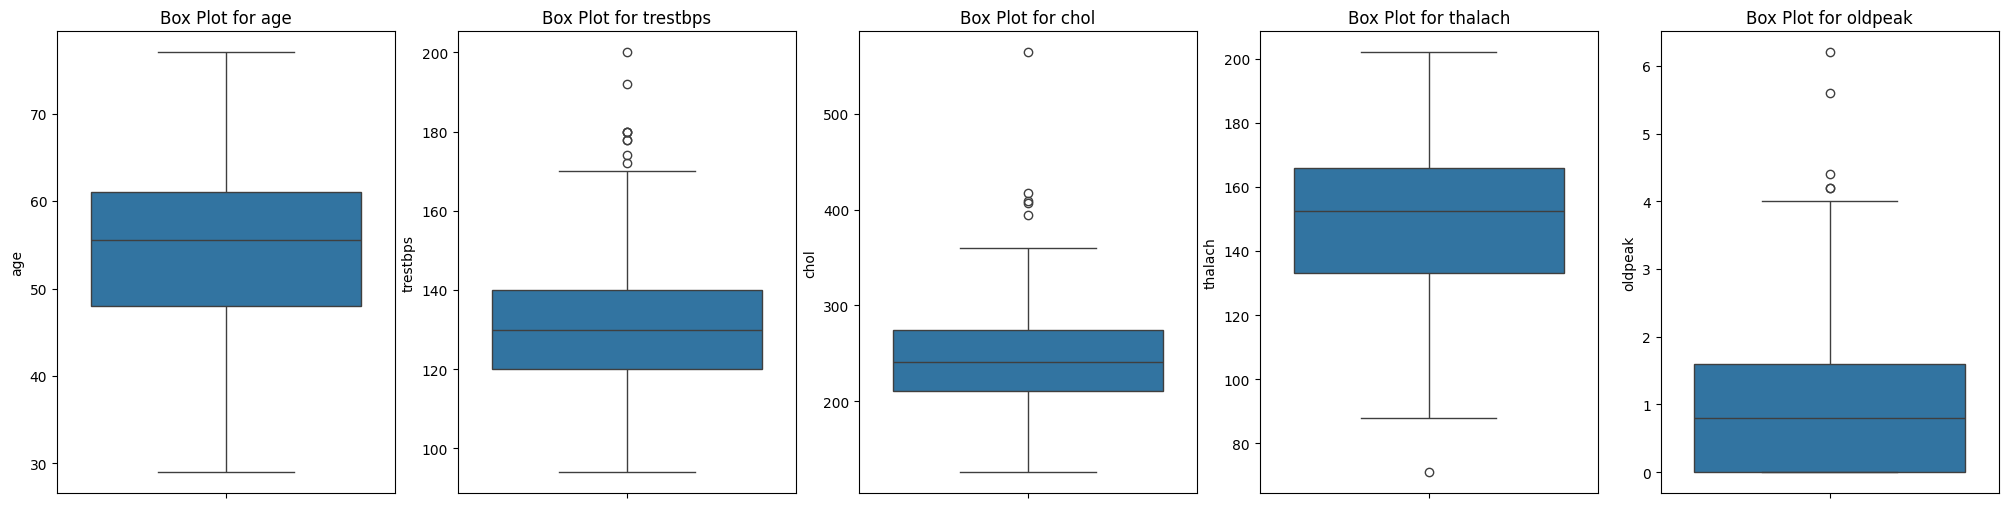

In [ ]:
# Membuat diagram kotak (box plot) untuk setiap kolom numerik
# Filter Kolom dengan Tipe Data Numerik
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Membuat Plot untuk Setiap Kolom Numerik:
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df2, ax=axs[i], whis=1.5)  # mengatur panjang whisker (garis yang menghubungkan kotak ke titik-titik di luar kotak) menjadi 1.5 kali IQR

    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')  # menghapus label sumbu x

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# Menghitung jumlah outlier di setiap kolom numerik
Q1 = df2[numeric_columns].quantile(0.25)
Q3 = df2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df2[numeric_columns] < (Q1 - 1.5 * IQR)) | (df2[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [ ]:
# mengatasi outliers
def handle_outliers_iqr(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df2[column] = np.where(df2[column] < lower_bound, lower_bound, np.where(df2[column] > upper_bound, upper_bound, df2[column]))

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = numeric_columns
for column in columns_with_outliers:
    handle_outliers_iqr(df2, column)

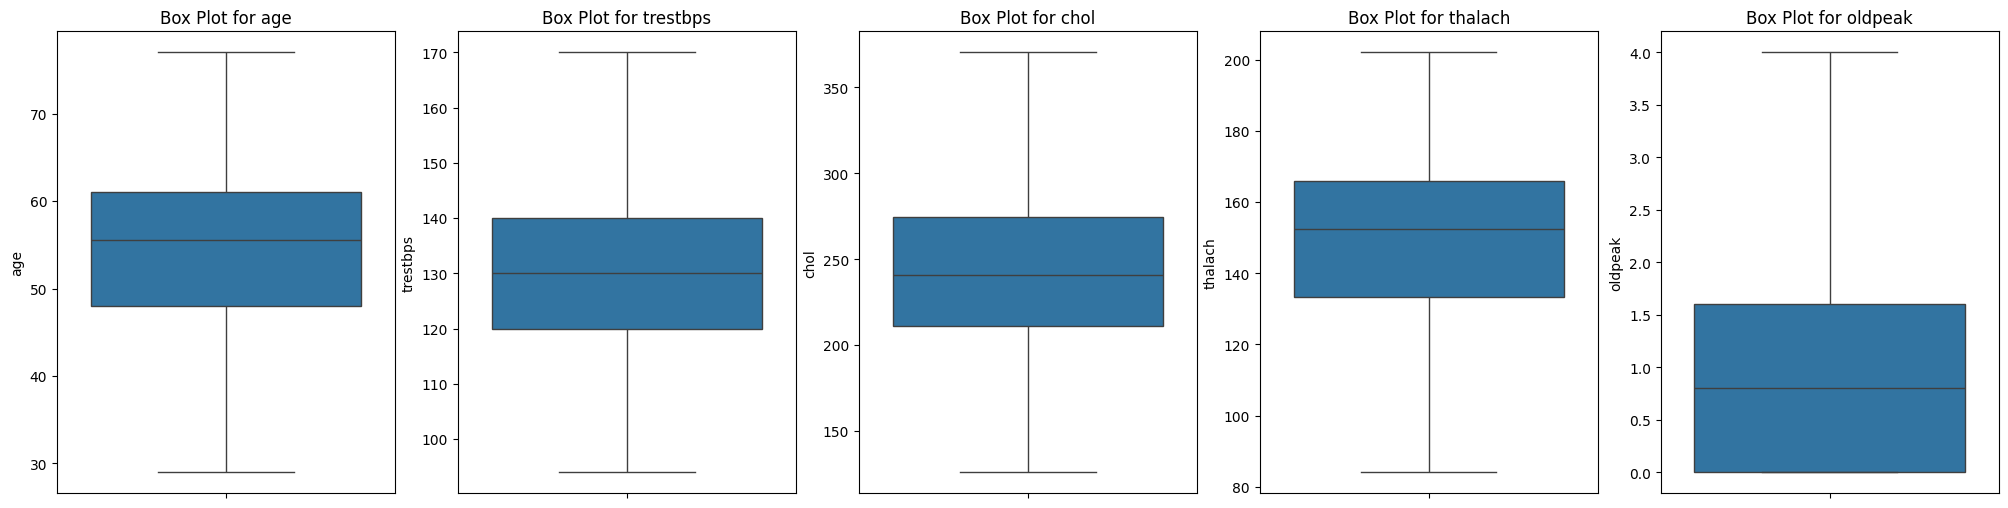

In [ ]:
# Membuat diagram kotak (box plot) untuk setiap kolom numerik
# Filter Kolom dengan Tipe Data Numerik
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Membuat Plot untuk Setiap Kolom Numerik:
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df2, ax=axs[i], whis=1.5)  # mengatur panjang whisker (garis yang menghubungkan kotak ke titik-titik di luar kotak) menjadi 1.5 kali IQR

    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')  # menghapus label sumbu x

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.000,48.00,55.5,61.00,77.000
sex,302.0,0.682119,0.466426,0.000,0.00,1.0,1.00,1.000
cp,302.0,0.963576,1.032044,0.000,0.00,1.0,2.00,3.000
trestbps,302.0,131.258278,16.605232,94.000,120.00,130.0,140.00,170.000
chol,302.0,245.377070,47.486683,126.000,211.00,240.5,274.75,370.375
fbs,302.0,0.149007,0.356686,0.000,0.00,0.0,0.00,1.000
restecg,302.0,0.526490,0.526027,0.000,0.00,1.0,1.00,2.000
thalach,302.0,149.612997,22.765983,84.125,133.25,152.5,166.00,202.000
exang,302.0,0.327815,0.470196,0.000,0.00,0.0,1.00,1.000
oldpeak,302.0,1.027815,1.110395,0.000,0.00,0.8,1.60,4.000


In [ ]:
# mengecek imbalance data
# terlebih dahulu menghitung jumlah nilai unik dan mencetak sebagian dari nilai unik tersebut
unique_values = df2['target'].unique()
print("Jumlah nilai unik:", len(unique_values))
print("Sebagian nilai unik:", unique_values[:10])  # Cetak 10 nilai unik pertama

Jumlah nilai unik: 2
Sebagian nilai unik: [0 1]


In [ ]:
df2.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

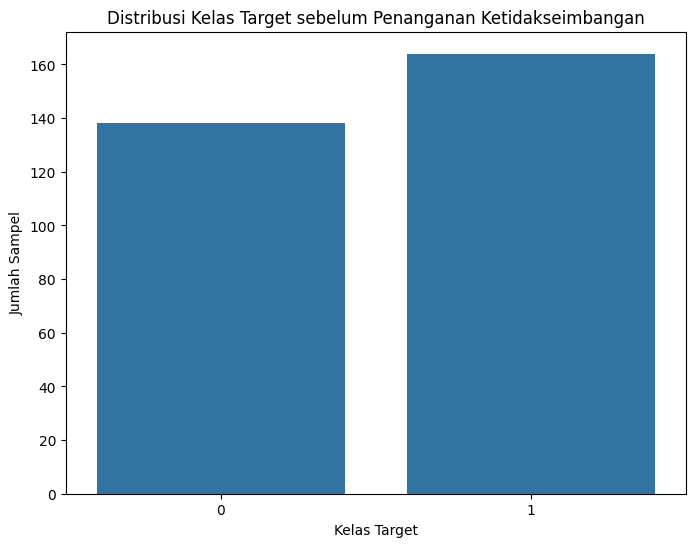

In [ ]:
# Visualisasi distribusi kelas sebelum penanganan imbalance
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='target')
plt.title('Distribusi Kelas Target sebelum Penanganan Ketidakseimbangan')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.show()

In [ ]:
# Mengatasi imbalance data
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menerapkan SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(df2.drop(columns=['target']), df2['target'])

# Membuat DataFrame baru dari hasil oversampling
df_resampled = pd.DataFrame(X_resampled, columns=df2.columns[:-1])
df_resampled['target'] = y_resampled

# Menampilkan jumlah sampel setelah oversampling
print(df_resampled['target'].value_counts())

target
0    164
1    164
Name: count, dtype: int64


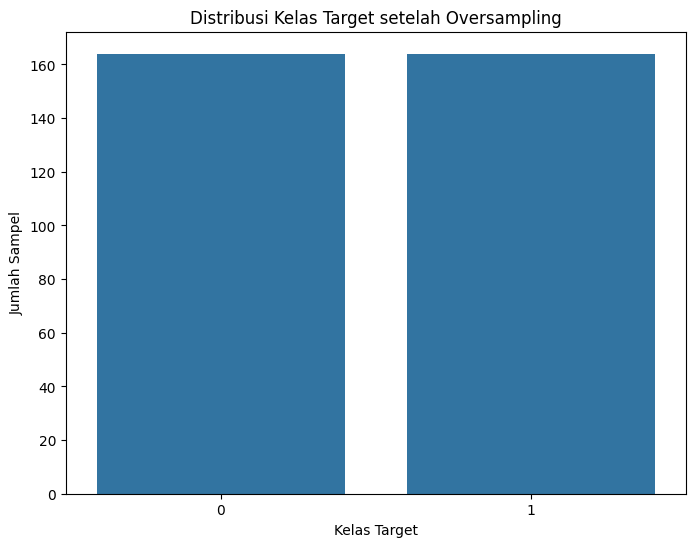

In [ ]:
# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x='target')
plt.title('Distribusi Kelas Target setelah Oversampling')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.show()

In [ ]:
df_resampled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.000000,1,0,125.000000,212.000000,0,1,168.000000,0,1.000000,2,2,3,0
1,53.000000,1,0,140.000000,203.000000,1,0,155.000000,1,3.100000,0,0,3,0
2,70.000000,1,0,145.000000,174.000000,0,1,125.000000,1,2.600000,0,0,3,0
3,61.000000,1,0,148.000000,203.000000,0,1,161.000000,0,0.000000,2,1,3,0
4,62.000000,0,0,138.000000,294.000000,1,1,106.000000,0,1.900000,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,51.367410,1,0,144.097672,201.172065,0,0,126.586033,0,1.007439,1,0,2,0
324,53.841903,1,0,140.000000,297.105398,0,0,172.052699,0,1.473693,1,0,3,0
325,60.760610,1,0,140.000000,181.401525,0,0,154.077255,1,1.760610,2,1,3,0
326,59.122038,1,1,126.488153,216.535541,0,0,133.755924,0,2.224408,1,1,1,0


In [ ]:
df3 = df_resampled.copy()
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       328 non-null    float64
 1   sex       328 non-null    int64  
 2   cp        328 non-null    int64  
 3   trestbps  328 non-null    float64
 4   chol      328 non-null    float64
 5   fbs       328 non-null    int64  
 6   restecg   328 non-null    int64  
 7   thalach   328 non-null    float64
 8   exang     328 non-null    int64  
 9   oldpeak   328 non-null    float64
 10  slope     328 non-null    int64  
 11  ca        328 non-null    int64  
 12  thal      328 non-null    int64  
 13  target    328 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 36.0 KB


In [ ]:
# Melakukan one-hot encoding dengan tipe data integer
data_encoded = pd.get_dummies(df3, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],
                              prefix=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],
                              dtype=int)

# Tampilkan hasil
data_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52.0,125.0,212.0,168.0,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53.0,140.0,203.0,155.0,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70.0,145.0,174.0,125.0,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61.0,148.0,203.0,161.0,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62.0,138.0,294.0,106.0,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


##1. Melakukan determinasi machine learning model yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.

In [ ]:
dataset = data_encoded.copy()

In [ ]:
# Standard Scaler
scaler = StandardScaler()
dataset[['age','trestbps','chol','thalach','oldpeak']] = scaler.fit_transform(dataset[['age','trestbps','chol','thalach','oldpeak']])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.286000,-0.418251,-0.706783,0.847884,-0.075353,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.173381,0.478596,-0.893483,0.284985,1.799658,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.741129,0.777545,-1.495071,-1.014013,1.353227,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.727565,0.956915,-0.893483,0.544785,-0.968216,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.840183,0.359017,0.994258,-1.836712,0.728223,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Menentukan fitur (X) dan target (y)
X = dataset.drop(columns=['target'])
y = dataset['target']

In [ ]:
# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

best_model = None
best_accuracy = 0

# Train and evaluate each classifier
for name, model in classifiers.items():
    print(f"Training {name}...")
    # Fitting model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)
    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    # Menampilkan laporan klasifikasi
    classification_rep = classification_report(y_test, y_pred)
    # Menampilkan matriks konfusi
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Menampilkan hasil evaluasi
    print(f"\n{classification_rep}")
    print(f"\nAccuracy of {name}: {accuracy:.2f}")
    print(f"\nConfusion Matrix of {name}:\n{conf_matrix}\n")

    # Memeriksa apakah model saat ini memiliki akurasi yang lebih baik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Model: {best_model}\nBest Accuracy: {best_accuracy:.2f}")

Training Logistic Regression...

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        42
           1       0.71      0.92      0.80        24

    accuracy                           0.83        66
   macro avg       0.83      0.85      0.83        66
weighted avg       0.86      0.83      0.84        66


Accuracy of Logistic Regression: 0.83

Confusion Matrix of Logistic Regression:
[[33  9]
 [ 2 22]]

Training Decision Tree...

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        42
           1       0.57      0.67      0.62        24

    accuracy                           0.70        66
   macro avg       0.68      0.69      0.68        66
weighted avg       0.71      0.70      0.70        66


Accuracy of Decision Tree: 0.70

Confusion Matrix of Decision Tree:
[[30 12]
 [ 8 16]]

Training Random Forest...

              precision    recall  f1-score   support

           0  

Setelah dilakukan percobaan mencar model terbaik di atas, dapat diperoleh bahwa model terbaik yang mungkin bisa digunakan untuk machine learning model permasalahan dataset Penyakit Jantung ini adalah model Logistic Regression.

# 2. Alasan penggunaan machine learning model.

Tujuan utama adalah untuk memprediksi apakah seorang pasien terdiagnosis menderita penyakit jantung atau tidak, yang merupakan masalah klasifikasi biner.

Dengan demikian, model machine learning yang paling relevan untuk masalah ini adalah model supervised learning.

Berdasarkan hasil evaluasi, model yang memberikan kinerja terbaik sesuai dengan tujuan analisis untuk memprediksi apakah seorang pasien terindikasi menderita penyakit jantung atau tidak, adalah model Regresi Logistik. Hal ini dapat dilihat dari nilai akurasi tertinggi (0.83) yang menunjukkan kemampuan model dalam mengklasifikasikan data dengan benar.

Dalam konteks ini, presisi 0.94 untuk kelas tidak terindikasi penyakit jantung berarti 94% dari pasien yang diprediksi tidak memiliki penyakit jantung oleh model memang tidak memiliki penyakit jantung. Di sisi lain, recall 0.92 untuk kelas terindikasi penyakit jantung berarti model dapat mendeteksi 92% dari semua kasus pasien yang sebenarnya memiliki penyakit jantung. Dengan nilai presisi dan recall yang tinggi, model Logistic Regression mampu memberikan prediksi yang akurat dan sensitif terhadap kasus penyakit jantung.

Selain itu, Regresi Logistik juga memiliki matriks konfusi yang menunjukkan jumlah true Positive (33) dan True Negative (22) yang lebih tinggi dibandingkan dengan model lainnya, serta jumlah False Positive (9) dan False Negative (2) yang relatif rendah. Hal ini menandakan bahwa Regresi Logistik memiliki tingkat kesalahan yang lebih rendah dalam memprediksi kasus positif dan negatif, sehingga memberikan gambaran yang lebih baik tentang model kinerja.

Dengan model Logistic Regression mungkin menjadi pilihan yang baik karena dengan pertimbangan berikut:

- Hasil dari model Logistic Regression dapat diinterpretasikan dengan mudah, sehingga memberikan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi prediksi.

- lebih efisien secara komputasi dibandingkan dengan model yang lebih kompleks seperti Random Forest, terutama ketika berhadapan dengan dataset yang besar.

- Ketika dataset memiliki struktur yang lebih sederhana dan masalah klasifikasi bersifat binomial (dua kelas), model Logistic Regression dapat memberikan hasil yang baik.

- Menghasilkan probabilitas sebagai output, yang dapat digunakan untuk menyebarkan tingkat keyakinan dalam prediksi.

Oleh karena itu, berdasarkan hasil evaluasi dan keunggulan model Logistic Regression, model ini dipilih sebagai model terbaik untuk untuk memprediksi apakah seorang pasien terindikasi menderita penyakit jantung atau tidak berdasarkan dataset yang ada.

# 3. Eksekusi coding machine learning model yang telah ditentukan dengan tepat sesuai urutan yang tepat.

In [ ]:
# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression()

In [ ]:
# Melatih model Logistic Regression
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_model.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# Prediksi
y_pred = logistic_model.predict(X_test)

In [ ]:
result = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
result

,Actual,Predicted
231,0,0
110,1,1
250,1,1
9,0,0
93,0,0
...,...,...
248,0,0
60,1,1
124,0,0
261,1,1


# 4. Menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.

In [ ]:
# Melakukan cross-validation dengan model Random Forest
cv_scores = cross_val_score(logistic_model, X, y, cv=5)

# Hitung rata-rata dari skor akurasi
mean_cv_accuracy = cv_scores.mean()

# Menampilkan hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", mean_cv_accuracy)

Cross-validation scores: [0.87878788 0.84848485 0.89393939 0.81538462 0.87692308]
Mean CV accuracy: 0.8627039627039625


# 5. Menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya.

Dalam hasil ini, terdapat lima lipatan cross-validation yang digunakan. Skor akurasi yang diperoleh menunjukkan variasi dalam performa model di setiap lipatan cross-validation. Misalnya, pada lipatan ketiga, model mencapai akurasi tertinggi sebesar 89.39%, sementara pada lipatan keempat, akurasinya lebih rendah, yaitu 81.54%.

Nilai rata-rata dari skor akurasi seluruh lipatan cross-validation adalah sebesar 0.8627039627039625, atau sekitar 86.27%. Ini mengindikasikan bahwa secara keseluruhan, model memiliki performa yang baik dalam mengklasifikasikan data.

Meskipun terdapat variasi dalam akurasi di setiap lipatan cross-validation, nilai rata-rata yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk mengklasifikasikan data dengan akurat secara umum.

# 6. Menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

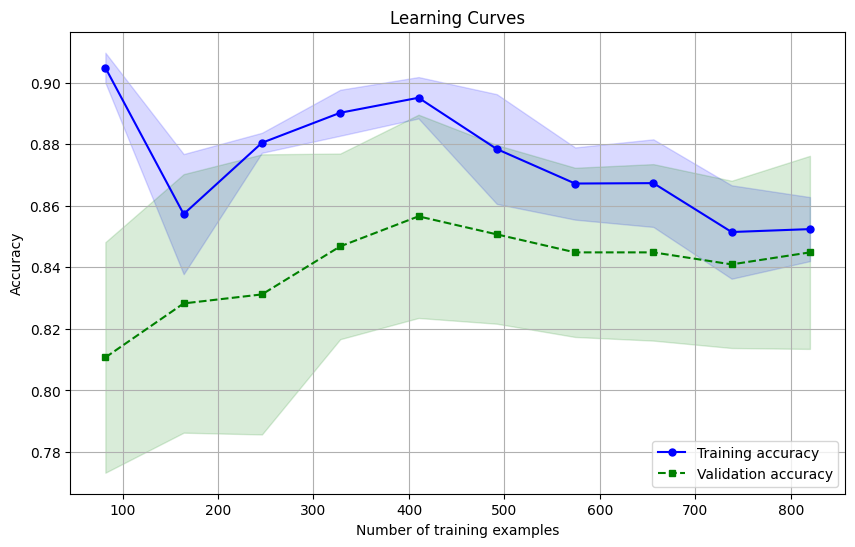

In [ ]:
# Fungsi untuk membuat dan menampilkan learning curves
def plot_learning_curves(logistic_model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curves')
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Memanggil fungsi untu-k membuat dan menampilkan learning curves
plot_learning_curves(logistic_model, df.drop('target', axis=1), df['target'])

# 7. Menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya.

Learning Curve di atas menunjukkan bahwa Training Accuracy meningkat seiring waktu. Hal ini karena model belajar mengidentifikasi pola dalam data yang memungkinkannya memprediksi penyakit jantung dengan lebih akurat.

- Peningkatan Training Accuracy menunjukkan bahwa model belajar dari data dan menjadi lebih baik dalam memprediksi penyakit jantung.

- Peningkatan Validation Accuracy menunjukkan bahwa model tidak hanya menghafal data pelatihan, tetapi juga belajar pola yang dapat digeneralisasikan ke data baru.

- Celah antara Training Accuracy dan Validation Accuracy relatif kecil. Hal ini menunjukkan bahwa model tidak mengalami overfitting yang signifikan.

Dengan demikian, Learning Curve penyakit jantung menunjukkan bahwa model belajar dengan baik dan dapat memprediksi penyakit jantung dengan akurat.

# 8. Memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.


Lebih baik menggunakan pendekatan hyperparameter tuning dengan GridSearchCV karena ini akan mencari kombinasi hyperparameter terbaik untuk modelsecara otomatis, sehingga meningkatkan kemungkinan mendapatkan model yang lebih baik.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

# Tentukan hyperparameters yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Bootstrapping
X_train_bootstrapped, y_train_bootstrapped = resample(X_train, y_train, n_samples=len(X_train), random_state=42)

# Lakukan pencarian grid pada data latih bootstrapped
grid_search.fit(X_train_bootstrapped, y_train_bootstrapped)

# Tampilkan hyperparameters terbaik
print("Hyperparameters terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Hyperparameters terbaik: {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# Lakukan prediksi pada data uji dengan model terbaik
best_logistic_reg = grid_search.best_estimator_
y_pred2 = best_logistic_reg.predict(X_test)

In [ ]:
result2 = pd.DataFrame({'Actual': y_test,'Predicted': y_pred2})
result2

,Actual,Predicted
231,0,0
110,1,1
250,1,1
9,0,0
93,0,0
...,...,...
248,0,0
60,1,1
124,0,0
261,1,1


# 9. Mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.

## Skenario 1: Metric evaluation berdasarkan model Logistic Regression yang telah dibuat sebelumnya

In [ ]:
# Mengukur kinerja model dengan berbagai metrik evaluasi
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print(f"\nConfusion Matrix:\n{conf_matrix}\n")

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        42
           1       0.71      0.92      0.80        24

    accuracy                           0.83        66
   macro avg       0.83      0.85      0.83        66
weighted avg       0.86      0.83      0.84        66


Confusion Matrix:
[[33  9]
 [ 2 22]]



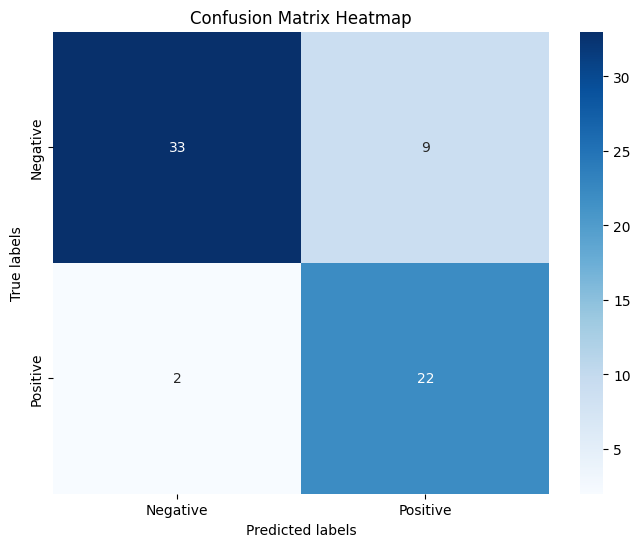

In [ ]:
# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Menambahkan label
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Negative', 'Positive'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.show()

## Skenario 2: Metric evaluation berdasarkan model Logistic Regression yang terbaik

In [ ]:
# Mengukur kinerja model dengan berbagai metrik evaluasi
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print(f"\nConfusion Matrix:\n{conf_matrix}\n")

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        42
           1       0.72      0.96      0.82        24

    accuracy                           0.85        66
   macro avg       0.84      0.87      0.84        66
weighted avg       0.88      0.85      0.85        66


Confusion Matrix:
[[33  9]
 [ 1 23]]



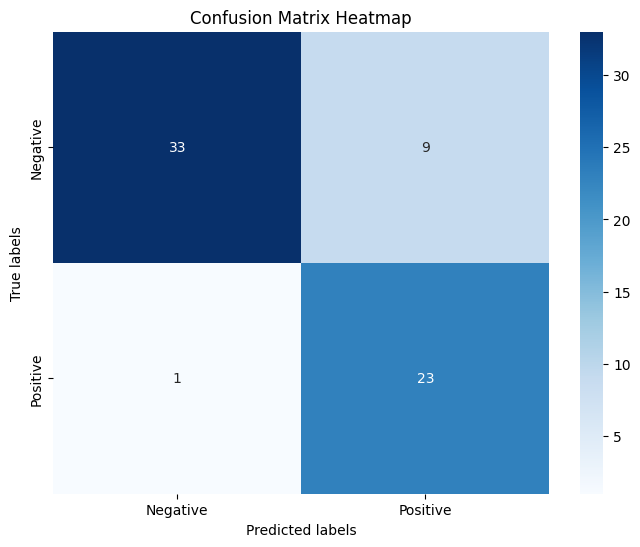

In [ ]:
# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Menambahkan label
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Negative', 'Positive'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.show()

# 10. Interpretasi dari hasil metric evaluation dan alasan pemilihan metric yang dipilih

Interpretasi dari hasil metric evaluation sebagai berikut:

**Skenario 1**:
1. Accuracy: Model memiliki akurasi yang tinggi sebesar 0.86, yang berarti model benar memprediksi kelas dari 86% total data. Akurasi yang tinggi menunjukkan bahwa model dapat dengan baik memprediksi apakah seseorang memiliki penyakit jantung atau tidak. Ini berarti model Random Forest ini dapat menjadi alat yang efektif untuk skrining awal atau diagnosis penyakit jantung.

2. Precision: Untuk kelas 0 (tidak memiliki penyakit jantung), precision adalah 0.97, yang berarti dari semua data yang diprediksi sebagai kelas 0, 97% benar-benar merupakan kelas 0. Untuk kelas 1 (memiliki penyakit jantung), precision adalah 0.72, yang berarti dari semua data yang diprediksi sebagai kelas 1, 72% benar-benar merupakan kelas 1.

3. Recall: Untuk kelas 0, recall adalah 0.79, yang berarti dari semua data kelas 0, model berhasil mengidentifikasi 79% sebagai kelas 0. Untuk kelas 1, recall adalah 0.92, yang berarti dari semua data kelas 1, model berhasil mengidentifikasi 92% sebagai kelas 1.

4. F1-score: F1-score adalah nilai rata-rata dari precision dan recall, yang memberikan ukuran keseimbangan antara keduanya cukup seimbang. F1-score untuk kelas 0 adalah 0.86 dan untuk kelas 1 adalah 0.80.

5. Confusion Matrix: Confusion matrix menunjukkan hasil prediksi yang lebih detail. Terdapat 33 true negative (TN), 9 false positive (FP), 2 false negative (FN), dan 22 true positive (TP). Dari hasil ini, model cenderung memiliki kinerja yang lebih baik dalam memprediksi kelas 1 (memiliki penyakit jantung) daripada kelas 0 (tidak memiliki penyakit jantung), mengingat jumlah false negative (FN) yang lebih rendah daripada false positive (FP). Hal ini menunjukkan bahwa model cenderung lebih hati-hati dalam memprediksi pasien yang sebenarnya memiliki penyakit jantung.

**Skenario 2**:
1. Accuracy: odel memiliki nilai akurasi sebesar 0.85 yang menunjukkan bahwa model memiliki kemampuan yang baik dalam memprediksi kelas dari 85% total data. Namun, dibandingkan dengan model sebelumnya yang memiliki akurasi 0.86, terdapat sedikit penurunan kinerja. Meskipun begitu, model ini masih dapat dianggap efektif dalam melakukan prediksi.

2. Precision: Precision untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.97, yang berarti dari semua data yang diprediksi sebagai kelas 0, 97% benar-benar merupakan kelas 0. Precision untuk kelas 1 (memiliki penyakit jantung) adalah 0.72, yang berarti dari semua data yang diprediksi sebagai kelas 1, 72% benar-benar merupakan kelas 1. Precision yang tinggi untuk kelas 0 menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi individu yang sebenarnya tidak memiliki penyakit jantung.

3. Recall: Recall untuk kelas 0 adalah 0.79, yang berarti dari semua data kelas 0, model berhasil mengidentifikasi 79% sebagai kelas 0. Sedangkan untuk kelas 1, recall adalah 0.96, yang berarti dari semua data kelas 1, model berhasil mengidentifikasi 96% sebagai kelas 1. Recall yang tinggi untuk kelas 1 menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi individu yang sebenarnya memiliki penyakit jantung.

4. F1-score: F1-score untuk kelas 0 adalah 0.87 dan untuk kelas 1 adalah 0.82. F1-score yang seimbang menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall untuk kedua kelas.

5. Confusion Matrix: Confusion matrix menunjukkan hasil prediksi yang lebih detail. Terdapat 33 true negative (TN), 9 false positive (FP), 1 false negative (FN), dan 23 true positive (TP). Dari hasil ini, model cenderung memiliki kinerja yang lebih baik dalam memprediksi kelas 1 (memiliki penyakit jantung) daripada kelas 0 (tidak memiliki penyakit jantung). Meskipun terdapat sedikit peningkatan false negative (FN) dan false positive (FP), namun penurunan tersebut masih dapat diterima dan model masih dapat dianggap efektif dalam melakukan prediksi.

Pada kedua skenario, peningkatan recall untuk kelas sakit (kelas 1) diprioritaskan.  Ini terlihat dari peningkatan akurasi dan F1-Score pada skenario 2.  Meskipun akurasi keseluruhan sedikit meningkat, penekanannya adalah memastikan model dapat mengidentifikasi penderita penyakit jantung dengan benar (recall tinggi).

---


Alasan pemilihan metric yang dipilih:

Dalam kasus ini, memilih metric evaluation tersebut untuk memastikan bahwa model dapat memprediksi dengan akurat apakah seseorang memiliki penyakit jantung atau tidak. Metric tersebut memberikan gambaran yang komprehensif tentang kinerja model terhadap kedua kelas (positif dan negatif), dengan mempertimbangkan akurasi keseluruhan (accuracy), keakuratan prediksi positif (precision), kemampuan mengidentifikasi kasus positif secara keseluruhan (recall), serta keseimbangan antara precision dan recall (F1-score). Confusion matrix memberikan informasi rinci tentang prediksi model, termasuk di mana model melakukan kesalahan dalam memprediksi kelas tertentu. Dengan mempertimbangkan semua ini, kita dapat mengevaluasi secara komprehensif kinerja model dalam memprediksi penyakit jantung.

----


Hasil evaluasi menunjukkan kinerja model yang baik dalam mengklasifikasikan penyakit jantung. Mempertimbangkan trade-off antara precision dan recall, penggunaan F1-Score sebagai metrik evaluasi tambahan selain akurasi dapat membantu dalam menilai kemampuan model untuk mengidentifikasi penderita penyakit jantung dengan benar.